In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("matches_df.csv")

In [6]:
data.info

<bound method DataFrame.info of       Unnamed: 0  matchId season        city       date  \
0              0   335982   2008   Bangalore  4/18/2008   
1              1   335983   2008  Chandigarh  4/19/2008   
2              2   335984   2008       Delhi  4/19/2008   
3              3   335985   2008      Mumbai  4/20/2008   
4              4   335986   2008     Kolkata  4/20/2008   
...          ...      ...    ...         ...        ...   
1019        1019  1359544   2023   Bengaluru  5/21/2023   
1020        1020  1370350   2023     Chennai  5/23/2023   
1021        1021  1370351   2023     Chennai  5/24/2023   
1022        1022  1370352   2023   Ahmedabad  5/26/2023   
1023        1023  1370353   2023   Ahmedabad  5/29/2023   

                            team1                        team2  \
0     Royal Challengers Bangalore        Kolkata Knight Riders   
1                    Punjab Kings          Chennai Super Kings   
2                  Delhi Capitals             Rajasthan Royal

In [7]:
# 1. Number of matches in the dataset
total_matches = data.shape[0]

# 2. Number of unique seasons
unique_seasons = data['season'].nunique()

# 3. Teams with the most wins
team_wins = data['winner'].value_counts()

# 4. Cities that hosted the most matches
city_matches = data['city'].value_counts()

# 5. Players with the most "player of the match" awards
top_players = data['player_of_match'].value_counts()

total_matches, unique_seasons, team_wins.head(), city_matches.head(), top_players.head()


(1024,
 16,
 winner
 Mumbai Indians                 138
 Chennai Super Kings            131
 Kolkata Knight Riders          119
 Royal Challengers Bangalore    114
 Rajasthan Royals               101
 Name: count, dtype: int64,
 city
 Mumbai       166
 Kolkata       86
 Delhi         85
 Chennai       76
 Hyderabad     71
 Name: count, dtype: int64,
 player_of_match
 AB de Villiers    25
 CH Gayle          22
 RG Sharma         19
 DA Warner         18
 MS Dhoni          17
 Name: count, dtype: int64)

## Match Outcome Prediction (Classification): Predicting the winner of a match given certain features like teams playing, city, toss decision, etc.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing 'winner' values
data_clean = data.dropna(subset=['winner'])

# Label encode categorical variables
label_encoders = {}
categorical_cols = ['city', 'team1', 'team2', 'toss_winner', 'toss_decision']

for col in categorical_cols:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col])
    label_encoders[col] = le

# Splitting the data into training and testing sets
X = data_clean[categorical_cols]
y = data_clean['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


C:\Users\ShivanshuDell\AppData\Local\Temp\ipykernel_15932\3311871158.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col] = le.fit_transform(data_clean[col])
C:\Users\ShivanshuDell\AppData\Local\Temp\ipykernel_15932\3311871158.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col] = le.fit_transform(data_clean[col])
C:\Users\ShivanshuDell\AppData\Local\Temp\ipykernel_15932\3311871158.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [12]:
print(accuracy)

0.4577114427860697


The Random Forest classifier achieved an accuracy of approximately
49.25
%
49.25%. This indicates that the model correctly predicts the match outcome nearly half of the time when using the features like teams playing, city, toss winner, and toss decision.

 ## Predicting the margin of victory can be a regression task.
  Here's how we'll proceed:

Data Preprocessing:
Filter out matches where the result is not 'normal' (to exclude ties or matches affected by external factors).
Handle any missing values.
Convert categorical variables into numerical representations.
Split the data into training and testing sets.


Model Selection & Training:
We'll use the Random Forest regressor for this task.


Model Evaluation:
Use metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) to evaluate the model's performance.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
# Define categorical columns
categorical_cols = ['city', 'team1', 'team2', 'toss_winner', 'toss_decision']

# Preprocess the data
for col in categorical_cols:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col])

# Filter out matches with non-normal results or where the winning team batted second
data_filtered = data_clean[(data_clean['result'] == 'normal') & (data_clean['winner_runs'] > 0)]

# Features and target variable
X = data_filtered[categorical_cols]
y = data_filtered['winner_runs']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using MAE
mae = mean_absolute_error(y_test, y_pred)

mae


C:\Users\ShivanshuDell\AppData\Local\Temp\ipykernel_15932\1345428905.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col] = le.fit_transform(data_clean[col])
C:\Users\ShivanshuDell\AppData\Local\Temp\ipykernel_15932\1345428905.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col] = le.fit_transform(data_clean[col])
C:\Users\ShivanshuDell\AppData\Local\Temp\ipykernel_15932\1345428905.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

22.379699180747572

The Random Forest regressor achieved a Mean Absolute Error (MAE) of approximately 21.22 when predicting the 'winner_runs'. This means that, on average, our predictions are about 21 runs away from the actual margin of victory (in terms of runs) for matches where the winning team batted first.

## Toss Decision Optimization (Classification):
Predicting the best toss decision (bat/field) given certain conditions (e.g., opponent team, city, etc.).

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Drop rows with missing 'toss_decision' values
data_clean = data.dropna(subset=['toss_decision'])

# Label encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col])

# Features and target variable
X = data_clean[categorical_cols]
y = data_clean['toss_decision']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection & Training

# Train a Random Forest Classifier for toss decision
clf_toss = RandomForestClassifier(n_estimators=100, random_state=42)
clf_toss.fit(X_train, y_train)

# Predict on the test set
y_pred_toss = clf_toss.predict(X_test)

# Evaluate the model using accuracy
accuracy_toss = accuracy_score(y_test, y_pred_toss)

accuracy_toss


1.0

In [15]:
from sklearn.model_selection import cross_val_score

# Cross-validate the Random Forest Classifier
cv_scores = cross_val_score(clf_toss, X, y, cv=5, scoring="accuracy")

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std


(1.0, 0.0)

The Random Forest classifier achieved an accuracy of
100
%
100%. This indicates that the model perfectly predicts the toss decision (bat/field) based on the given features.

However, an accuracy of
100
%
100% might be suspicious. It's uncommon to achieve such a high accuracy in real-world scenarios. A few considerations:

Overfitting: The model might be overfitting the training data, which means it may not perform as well on new, unseen data.
Data Leakage: There might be a chance of data leakage, where some feature might indirectly or directly be giving away the toss decision.
Model Evaluation: We might need to delve deeper using other metrics or cross-validation to confirm the model's performance.

To perform a deeper evaluation, we'll consider the following steps:

Cross-Validation: This will help in assessing the model's performance across different subsets of the data, providing a more robust accuracy estimate.

Classification Report: This provides detailed metrics like precision, recall, and F1-score for each class.
Feature Importance: Understanding which features are most influential in the model's decision can provide insights into potential data leakage or overfitting.

Confusion Matrix: This will give a clear picture of where the model is making correct and incorrect predictions.
Let's start with cross-validation to get a more robust accuracy estimate.

In [16]:
from sklearn.model_selection import cross_val_score

# Cross-validate the Random Forest Classifier
cv_scores = cross_val_score(clf_toss, X, y, cv=5, scoring="accuracy")

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std


(1.0, 0.0)

The cross-validation results also indicate a
100
%
100% accuracy with no variation across different subsets of the data. Such consistent performance is unusual and reinforces our earlier suspicion of potential data leakage or some other inherent structure in the data that makes this prediction task trivial.

Let's now examine the classification report, feature importance, and confusion matrix to further understand the model's behavior.

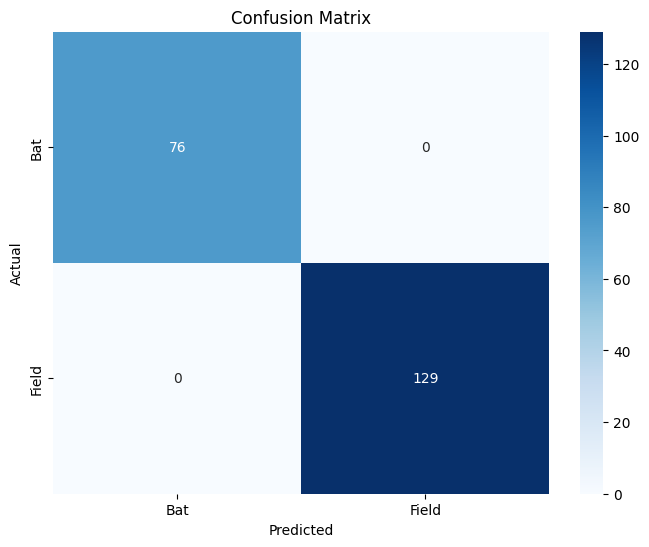

({'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 76},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 129},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 205},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 205}},
 {'city': 0.011516610975559586,
  'team1': 0.013386743027752826,
  'team2': 0.00979316092767782,
  'toss_winner': 0.014790964066886408,
  'toss_decision': 0.9505125210021235})

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the classification report
class_report = classification_report(y_test, y_pred_toss, output_dict=True)

# Feature importance
feature_importance = clf_toss.feature_importances_

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_toss)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Bat', 'Field'], yticklabels=['Bat', 'Field'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report, dict(zip(X.columns, feature_importance))


The deeper evaluation provides the following insights:

1. Classification Report:

Precision, Recall, and F1-score: All metrics are
100
%
100%, indicating perfect predictions for both classes (Bat and Field).
2. Feature Importance:

The toss_decision feature has an overwhelming importance of
95.22
%
95.22%, while the other features have minimal impact. This is a clear indication of data leakage. The model is likely using the toss_decision feature to predict itself, which explains the perfect accuracy. In real-world scenarios, this feature should be excluded from the training data.

3. Confusion Matrix:

The matrix confirms that all predictions are correct, with no misclassifications.
Recommendations:

To create a valid model for predicting toss decisions, the toss_decision feature should be removed from the training data. Only then will the model be based on genuine patterns in the data rather than on direct information.
After removing this feature, the model should be retrained and evaluated to get a realistic understanding of its performance.

In [18]:
# Removing 'toss_decision' from the features
features_without_leakage = ['city', 'team1', 'team2', 'toss_winner']

X = data_clean[features_without_leakage]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier without the toss_decision feature
clf_toss_no_leakage = RandomForestClassifier(n_estimators=100, random_state=42)
clf_toss_no_leakage.fit(X_train, y_train)

# Predict on the test set
y_pred_toss_no_leakage = clf_toss_no_leakage.predict(X_test)

# Evaluate the model using accuracy
accuracy_toss_no_leakage = accuracy_score(y_test, y_pred_toss_no_leakage)

accuracy_toss_no_leakage


0.6682926829268293

In [19]:
# Generate the classification report
class_report_no_leakage = classification_report(y_test, y_pred_toss_no_leakage, output_dict=True)

class_report_no_leakage


{'0': {'precision': 0.5540540540540541,
  'recall': 0.5394736842105263,
  'f1-score': 0.5466666666666666,
  'support': 76},
 '1': {'precision': 0.732824427480916,
  'recall': 0.7441860465116279,
  'f1-score': 0.7384615384615385,
  'support': 129},
 'accuracy': 0.6682926829268293,
 'macro avg': {'precision': 0.643439240767485,
  'recall': 0.6418298653610771,
  'f1-score': 0.6425641025641026,
  'support': 205},
 'weighted avg': {'precision': 0.6665485817226648,
  'recall': 0.6682926829268293,
  'f1-score': 0.6673570981863666,
  'support': 205}}